# Exploring the effect of network architecture on 2D data
This notebook will demonstrate how the number of layers and nodes per layer can affect a network's prediction accuracy. Here's what you'll do:
1. Load a toy dataset from sklearn: two half-circles with noise, plot the generated data
2. Build a __[Keras Sequential](https://keras.io/models/sequential/)__ model with only one layer to classify the points in each half-circle
3. Plot the classifier's __[decision boundary/class regions](http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex8materials/ex8b_100.png)__ (sample decision boundary shown in the image)
4. Add new layers and nodes to the model and observe how the decision boundary changes

In [1]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import regularizers

np.set_printoptions(threshold=np.nan)

Using TensorFlow backend.


## 1. Load the toy dataset from scikitlearn
 - Generate 500 data points from the toy dataset with a small amount of noise
 - Try a noise value $0.2 < noise < 1.0$
 - Turn value labels into vectors (e.g. label 0 -> [1 0] and label 1 -> [0 1])
 - Plot the sample generated data, there should be some overlap between purple and yellow data points

In [3]:
# Don't need to change anything here.
num_samples = 500
X, y = sklearn.datasets.make_moons(n_samples=num_samples, noise=0.2)
labels = np.zeros(X.shape)

print(X.shape)
print(y.shape)
print(labels.shape)

for i in range(num_samples):
    labels[i, 0] = y[i]
    labels[i, 1] = 1. - y[i]

(500, 2)
(500,)
(500, 2)


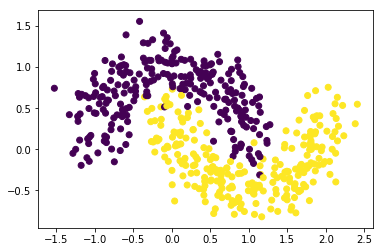

In [4]:
# Don't need to change anything here.
# The c parameter lets you assign class colors; assumes that 
# a row in X has the label referenced by the same row number
# of y.
scolors = ['red' if l > 0 else 'green' for l in y]
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

The number of features is the number of dimensions of the data that we're using to build the model. Since our input data is a set of $(x, y)$ coordinates, our data only has two features. If our data consisted of $(x, y, z)$ coordinates, we'd have three features.

The toy dataset produces points that can belong to one of two classes, so the output layer of our network will have two nodes (or neurons).

In [5]:
# Don't need to change anything here.
num_features = X.shape[1]
num_labels = 2

## 2. Build a sequential model with two layers (an output layer and a hidden layer)
 - Create a new sequential model
 ```python
 model = Sequential()
 ```

In [6]:
model = Sequential()


 - Add two __[dense layers](https://keras.io/layers/core/#dense)__ (example with more nodes shown)

   The input_dim in the first layer refers to the number of features the data has.   
   The number of hidden features is a value that you can pick (the larger the number of hidden units, the longer your model will take to train)   

 ![Single dense layer, the first set of nodes is for the input](http://machinethink.net/images/vggnet-convolutional-neural-network-iphone/FCLayer.png "Fully connected layer")
 ```python
 model.add(Dense(num_hidden_units, input_dim=num_features, activation='tanh'))
 model.add(Dense(num_outputs, activation='softmax')
 ```

In [7]:
# Add code here
model.add(Dense(32, input_dim=num_features, activation='softsign'))
model.add(Dense(2, activation='softmax'))


 - Create an __[optimizer](https://keras.io/optimizers/)__ that will be used to train the network
  ```python
  sgd = optimizers.SGD(lr=0.0001)
  ```


In [8]:
# Add code here
sgd = optimizers.SGD(lr=0.0001)

 - Compile the model, where you attach the optimizer to the model, pick a loss function, and choose a metric for to tell how well training is going. We use __[categorical crossentropy](https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/)__ as the loss function because we're training a classifier.
  ```python
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
  ```

In [9]:
# Add code here
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

 - __[Fit]()__ the model to the data and capture the model's training history (this is very similar to Scikitlearn's '.fit' method for its models)
```python
history = model.fit(X, labels, batch_size=128, epochs=num_epochs, verbose=0, validation_split=0.2)
```

In [10]:
# Add code here
history = model.fit(X, labels, batch_size=128, epochs=3000, verbose=0, validation_split=0.2)

## 3. Plot the classifier's decision boundary
 - The function below creates a set of $200\times200$ points on a grid whose corners are specified by xmin, xmax, ymin, and ymax
 - A class prediction is made for each point in the grid
 - Regions of the grid that belong to the same class are given the same color; the training data is plotted along with the class regions
 - All you have to do is call this method and pass it the trained model (and any boundaries you want to use)

In [11]:
def plot_decision_boundary(model, xmin=-2, xmax=3, ymin=-2, ymax=2):
    '''
    Given a Keras model trained on 2-class 2D data, this method plots the
    decision boundary and the regions belonging to either class.
    '''
    xl = np.linspace(xmin, xmax, 200)
    yl = np.linspace(ymin, ymax, 200)
    xv, yv = np.meshgrid(xl, yl)
    mesh_pred = np.zeros((200, 200))
    for i in range(200):
        for j in range(200):
            loc = np.zeros((1,2))
            loc[0,0] = xv[i, j]
            loc[0,1] = yv[i, j]
            #print(loc)
            #print(loc.shape)
            pred = model.predict(loc, batch_size=1)

            mesh_pred[i, j] = 1. if pred[0,0] > pred[0,1] else 0.
            
    plt.pcolor(xv, yv, mesh_pred)
    scolors = ['black' if l > 0 else 'white' for l in y]
    plt.scatter(X[:,0], X[:,1], c=scolors, s=10.)
    plt.draw()
    plt.show(block=False)

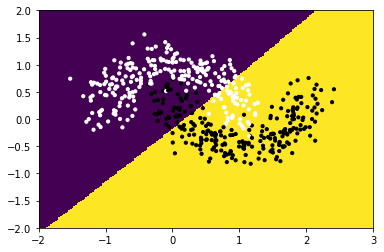

In [12]:
# Call the decision boundary plotter
plot_decision_boundary(model)

## 4. Modify the existing network
 - What does the region look like? How well does it contain the data?
 - Go back to step **2** and change the number of neurons in your hidden layer and run the notebook cells again
* If you have a large number of neurons, decrease them; if you have a small number of neurons, increase them
 - What happens if you add another layer, how does the shape of the decision boundary change?
 - Feel free to try different __[activation functions](https://keras.io/activations/)__ on all but the output layer